In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\studies\ml csv files\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

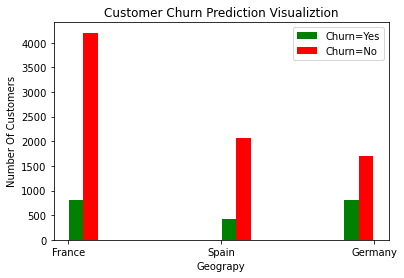

In [8]:
geo_churn_no = df[df.Exited==0].Geography
geo_churn_yes = df[df.Exited==1].Geography

plt.xlabel("Geograpy")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([geo_churn_yes, geo_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

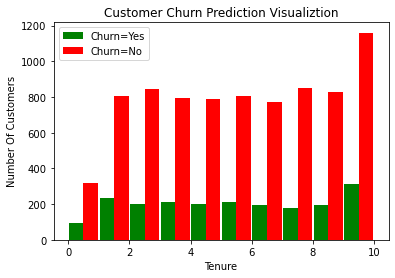

In [9]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [10]:
df.Gender.replace({'Female':0,'Male':1},inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [14]:
col_to_scale=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,0,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,0,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,0,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,0,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,0,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [16]:
df.dtypes

CreditScore        float64
Geography           object
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df2=pd.get_dummies(data=df,columns=['Geography','NumOfProducts'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [18]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.324324,0.2,0.000000,1,1,0.506735,1,1,0,0,1,0,0,0
1,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,0,0,0,1,1,0,0,0
2,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,1,1,0,0,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0,0,0.469120,0,1,0,0,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,0,0,0,1,1,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df2.drop('Exited',axis='columns')
y=df2['Exited']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(8000, 15)

In [23]:
len(X_train.columns)

15

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
model = keras.Sequential([
    keras.layers.Dense(30,input_shape=(15,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [26]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
             )

In [27]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 628us/step - loss: 0.4697 - accuracy: 0.7895
Epoch 2/100
250/250 [==============================] - 0s 670us/step - loss: 0.3975 - accuracy: 0.8276
Epoch 3/100
250/250 [==============================] - 0s 697us/step - loss: 0.3823 - accuracy: 0.8389
Epoch 4/100
250/250 [==============================] - 0s 620us/step - loss: 0.3746 - accuracy: 0.8414
Epoch 5/100
250/250 [==============================] - 0s 654us/step - loss: 0.3707 - accuracy: 0.8449
Epoch 6/100
250/250 [==============================] - 0s 585us/step - loss: 0.3667 - accuracy: 0.8436
Epoch 7/100
250/250 [==============================] - 0s 638us/step - loss: 0.3629 - accuracy: 0.8465
Epoch 8/100
250/250 [==============================] - 0s 604us/step - loss: 0.3605 - accuracy: 0.8464
Epoch 9/100
250/250 [==============================] - 0s 593us/step - loss: 0.3579 - accuracy: 0.8471
Epoch 10/100
250/250 [==============================] - 0s 565us/step - l

250/250 [==============================] - 0s 730us/step - loss: 0.3251 - accuracy: 0.8662
Epoch 80/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8658
Epoch 81/100
250/250 [==============================] - 0s 966us/step - loss: 0.3263 - accuracy: 0.8662
Epoch 82/100
250/250 [==============================] - 0s 725us/step - loss: 0.3243 - accuracy: 0.8673
Epoch 83/100
250/250 [==============================] - 0s 821us/step - loss: 0.3256 - accuracy: 0.8660
Epoch 84/100
250/250 [==============================] - 0s 971us/step - loss: 0.3235 - accuracy: 0.8664
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8685
Epoch 86/100
250/250 [==============================] - 0s 984us/step - loss: 0.3230 - accuracy: 0.8670
Epoch 87/100
250/250 [==============================] - 0s 865us/step - loss: 0.3245 - accuracy: 0.8679
Epoch 88/100
250/250 [==============================] - 0s 724us/step - loss: 0.3

In [28]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 983us/step - loss: 0.3418 - accuracy: 0.8610


[0.34179913997650146, 0.8610000014305115]

In [29]:
pred= model.predict(X_test)

In [30]:
prediction=[]
for i in pred:
    if i < 0.5:
        prediction.append(0)
    else:
        prediction.append(1)

Text(69.0, 0.5, 'truth')

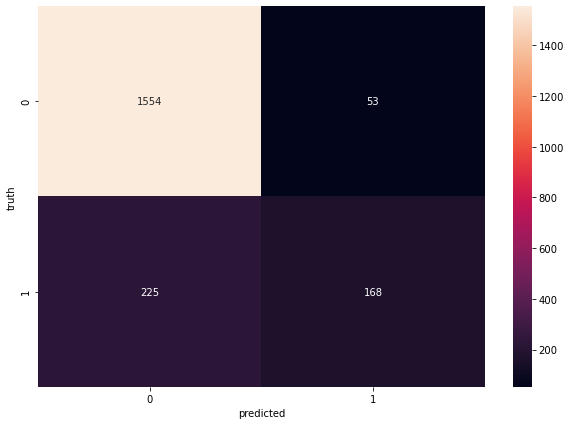

In [35]:
import seaborn as sn
cm =tf.math.confusion_matrix(labels=y_test,predictions=prediction)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000

